### Linear Regression with one variable Project 

#### Predicting Uber™️ Fare Amount using Trip distance

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math, copy

In [2]:
data = pd.read_csv("uber_data.csv")

In [3]:
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,2016-03-01 06:17:10,2016-03-01 06:22:15,1,0.50,-73.990898,40.750519,1,N,-73.998245,40.750462,2,5.0,0.0,0.5,0.00,0.00,0.3,5.80
99996,1,2016-03-01 06:17:10,2016-03-01 06:32:41,1,3.40,-74.014488,40.718296,1,N,-73.982361,40.752529,1,14.0,0.0,0.5,2.00,0.00,0.3,16.80
99997,1,2016-03-01 06:17:10,2016-03-01 06:37:23,1,9.70,-73.963379,40.774097,1,N,-73.865028,40.770512,1,29.0,0.0,0.5,8.80,5.54,0.3,44.14
99998,2,2016-03-01 06:17:10,2016-03-01 06:22:09,1,0.92,-73.984901,40.763111,1,N,-73.970695,40.759148,1,5.5,0.5,0.5,1.36,0.00,0.3,8.16


#### Training the model with 50 samples

In [4]:
x_train = data["trip_distance"][:50]
y_train = data["fare_amount"][:50]

A **scatter plot** is used to check the relationship with the fare amount against the trip distance. Its a **positive correlation**

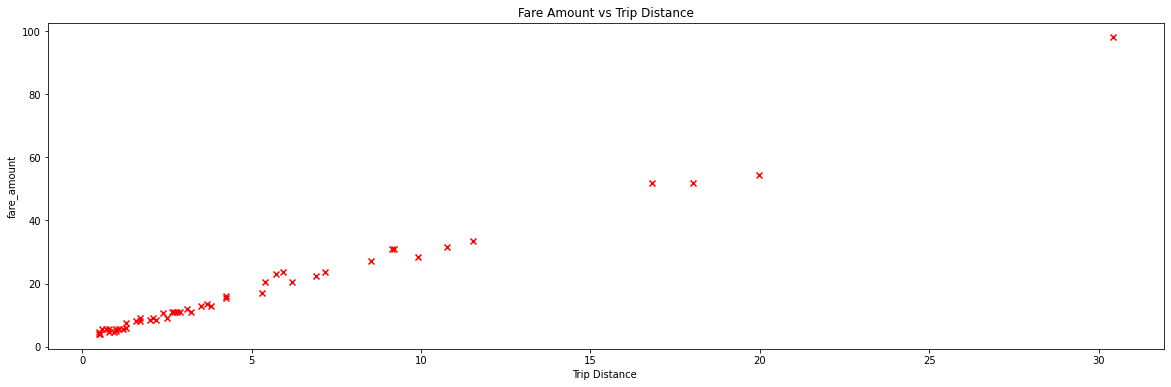

In [6]:
# Set the title
plt.figure(figsize=(20,6))
plt.title("Fare Amount vs Trip Distance")
plt.scatter(x_train, y_train, marker='x', c='r',)
plt.ylabel('fare_amount')
plt.xlabel('Trip Distance ')
plt.show()

The cost function checks the difference between the prediction values and the target values, ur target is to find the minimum difference between our prediction and the target value.

The gradient function checks the gradient of each point on the cost funciton allowing us to get teh best possible values of w and b for which the cost function would be a minimum

The gradient descent function takes in a learning rate and number of iterations as a prameter which would allow us to control the speed in which our algorithm reaches the local mimumum. once this is complete we have found our ideal values for w and b.

In [7]:
def costfunction(x,y,w,b):
    m=x.shape[0]
    cost=0
    for i in range(m):
        fx_wb=w*x[i]+b
        cost = cost+ (fx_wb-y[i])**2
    totalcost=(1/(2*m))*cost
    return totalcost

def gradient(x,y,w,b):
    m=x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    w = copy.deepcopy(w_in) # avoid modifying global w_in
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    rows=[]
    col=["Iteration","Cost","dj_dw","dj_db","w","b"]
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            row = ["%.2f" % i,"%.2f" %J_history[-1],"%.2f" %dj_dw,"%.2f" %dj_db,"%.2f" %w,"%.2f" %b]
            rows.append(row)
            
    
    df=pd.DataFrame(rows, columns=col)
    print(df)
     
    return w, b, J_history, p_history #return w and J,w history for graphing

In [8]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, costfunction, gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

  Iteration   Cost    dj_dw   dj_db     w     b
0      0.00  51.27  -185.92  -17.42  1.86  0.17
1   1000.00   1.70     0.00   -0.00  2.91  2.72
2   2000.00   1.70     0.00   -0.00  2.91  2.73
3   3000.00   1.70     0.00   -0.00  2.91  2.73
4   4000.00   1.70     0.00   -0.00  2.91  2.73
5   5000.00   1.70     0.00   -0.00  2.91  2.73
6   6000.00   1.70     0.00   -0.00  2.91  2.73
7   7000.00   1.70     0.00   -0.00  2.91  2.73
8   8000.00   1.70     0.00   -0.00  2.91  2.73
9   9000.00   1.70     0.00   -0.00  2.91  2.73
(w,b) found by gradient descent: (  2.9117,  2.7278)


calculting all our predictions for each training dataset

In [9]:
y_predictions=[]
for i in range (len(x_train)):
    y_predictions.append(w_final*x_train[i]+b_final)

Plotting our prediction along with the target for each training sample. The red color markers represent our predictions Therefore we can conclude that our model is quite accurate in preciting the fare amount from the trip distance.

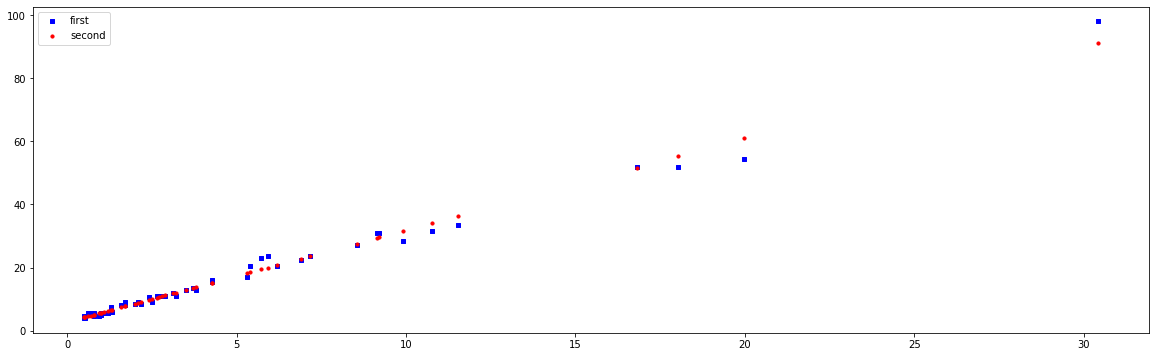

In [10]:
fig =plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(111)
ax1.scatter(x_train, y_train, s=10, c='b', marker="s", label='first')
ax1.scatter(x_train,y_predictions, s=10, c='r', marker="o", label='second')
plt.legend(loc='upper left')
plt.show()